**ARTIFICIAL INTELLIGENCE PROJECT 2025-1**

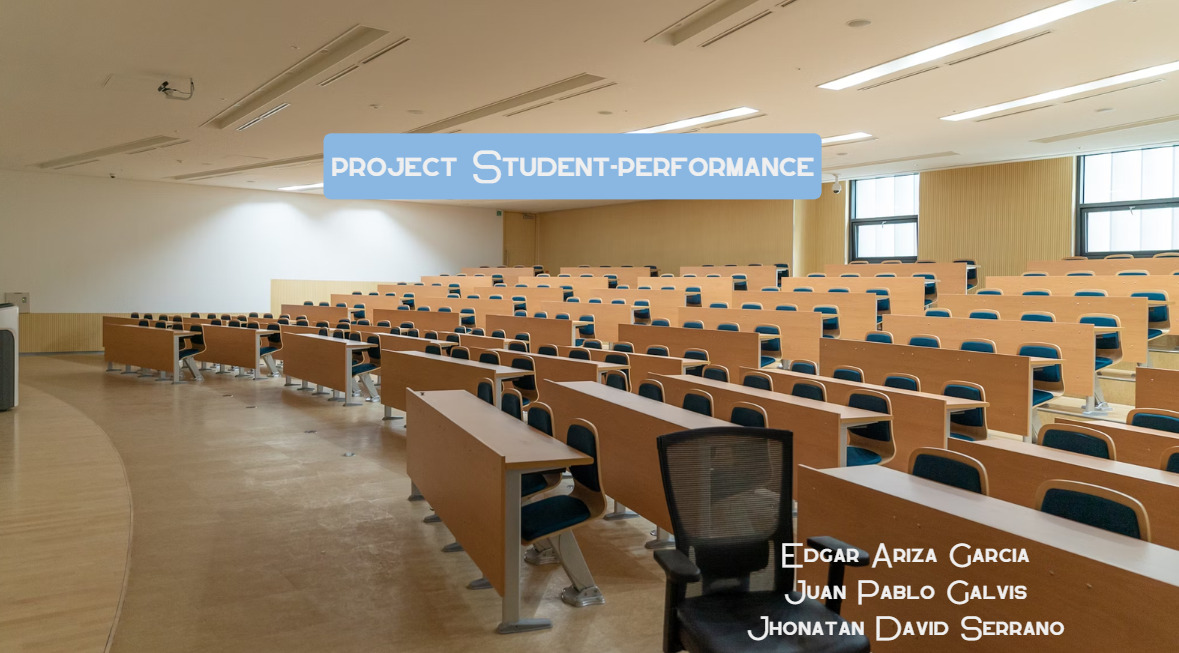

1. **INTRODUCCIÓN**

**INTEGRANTES**


*   Edgar Santiago Ariza García - 2211881
*   Juan Pablo Galvis Perez - 2202044
*   Jhonatan David Serrano Acevedo - 2200171





**INFORMACIÓN**

El análisis de datos educativos es clave para mejorar el desempeño estudiantil y personalizar estrategias de aprendizaje. Este proyecto busca identificar patrones en el comportamiento académico de los estudiantes y su impacto en el rendimiento, utilizando técnicas de análisis de datos.

Para ello, trabajamos con un conjunto de datos del sistema de gestión de aprendizaje Kalboard 360, que recopila información mediante Experience API (xAPI) sobre la actividad de los estudiantes. El dataset incluye 480 registros y 16 atributos, divididos en tres categorías: demográficos (género, nacionalidad), académicos (nivel educativo, grado, sección) y comportamentales (participación en clase, uso de recursos, encuestas de padres y satisfacción escolar). A partir de este análisis, buscamos obtener conclusiones útiles para optimizar el aprendizaje con el rendimiento clasificado en tres niveles:

Low-Level (0-69) /
Middle-Level (70-89) /
High-Level (90-100)

**ATRIBUTOS**

1. Gender - Género del estudiante (nominal: 'Masculino' o 'Femenino').
2. Nationality - Nacionalidad del estudiante.
3. Place of birth - Lugar de nacimiento del estudiante.
4. Educational stages - Nivel educativo al que pertenece el estudiante (nominal: ‘Nivel inferior’, ‘Escuela secundaria’, ‘Preparatoria’).
5. Grade Levels - Grado en el que está el estudiante (nominal: ‘G-01’ a ‘G-12’).
6. Section ID - Aula a la que pertenece el estudiante (nominal: ‘A’, ‘B’, ‘C’).
7. Topic - Asignatura del curso (nominal: ‘Inglés’, ‘Español’, ‘Francés’, ‘Árabe’, ‘Informática’, ‘Matemáticas’, ‘Química’, ‘Biología’, ‘Ciencias’, ‘Historia’, ‘Corán’, ‘Geología’).
8. Semester - Semestre del año escolar (nominal: ‘Primero’, ‘Segundo’).
9. Parent responsible for student - Persona responsable del estudiante (nominal: ‘Madre’, ‘Padre’).
10. Raised hands - Número de veces que el estudiante levanta la mano en clase (numérico: 0-100).
11. Visited Resources - Número de veces que el estudiante visita el contenido del curso (numérico: 0-100).
12. Viewing announcements - Número de veces que el estudiante revisa los nuevos anuncios (numérico: 0-100).
13. Discussion groups - Número de veces que el estudiante participa en grupos de discusión (numérico: 0-100).
14. Parent Answering Survey - Indica si los padres respondieron las encuestas de la escuela (nominal: ‘Sí’, ‘No’).
15. Parent School Satisfaction - Grado de satisfacción de los padres con la escuela (nominal: ‘Sí’, ‘No’).
16. Student Absence Days - Número de días de ausencia del estudiante (nominal: ‘Más de 7’, ‘Menos de 7’).

2. **CARGA DE DATOS**

Establece el drive


In [2]:
import os
from google.colab import drive

path_ai = "Artificial_Intelligence_I/Project" #@param {type:"string"}
path = "/content/drive/MyDrive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Artificial_Intelligence_I/Project


Importar las librerias.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cargar el dataset

In [4]:
df = pd.read_csv("xAPI-Edu-Data.csv")
data = pd.concat([df], ignore_index=True)
print(data.head())

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

3. **VISUALIZACIÓN DE DATOS**

Histogramas y Pie plot

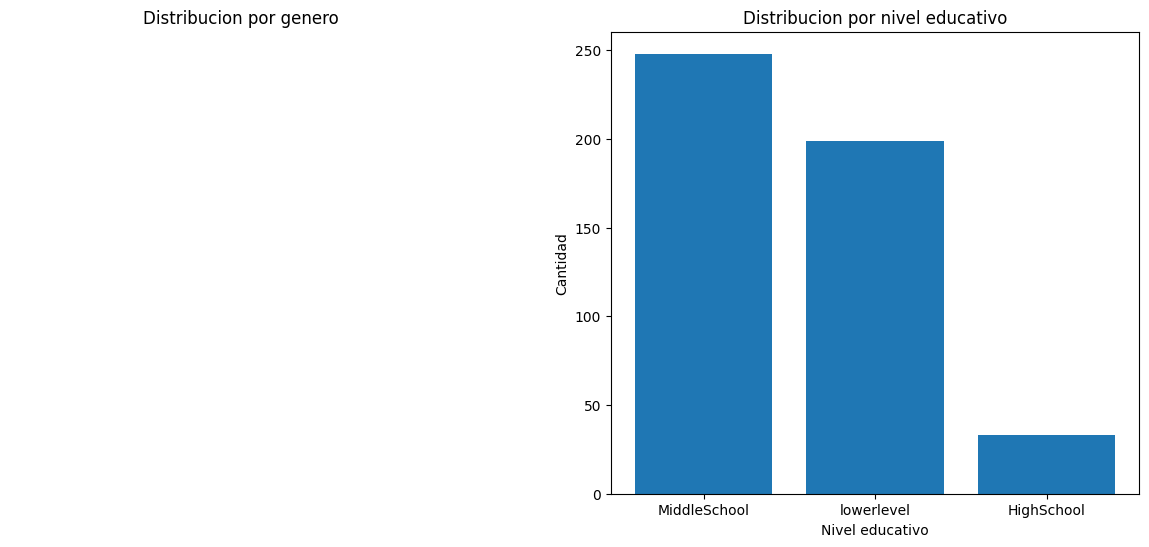

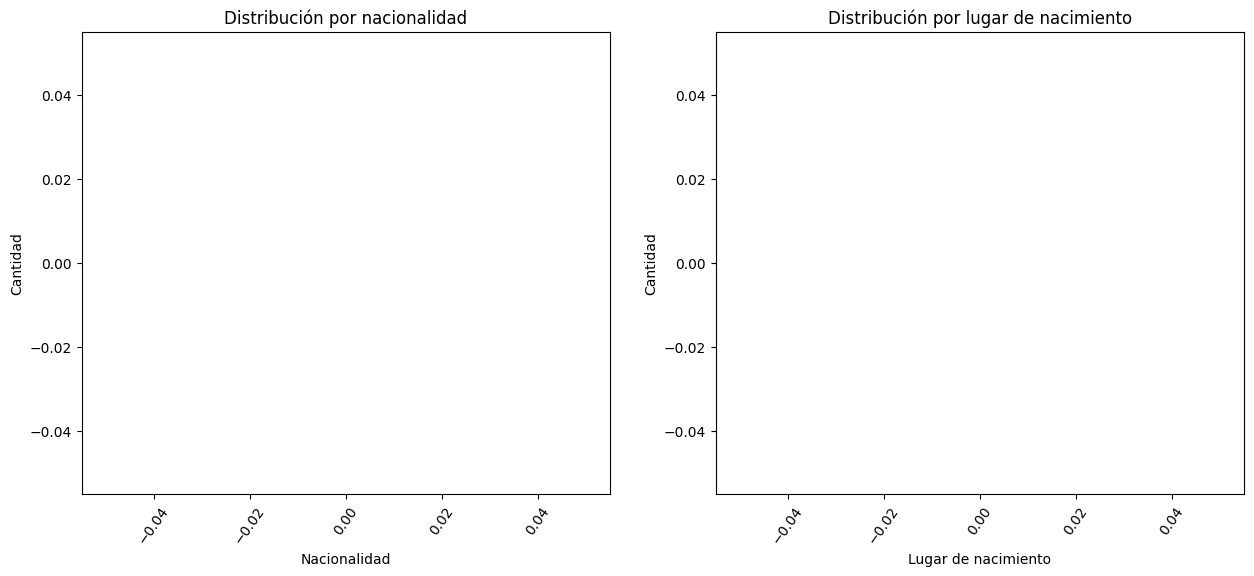

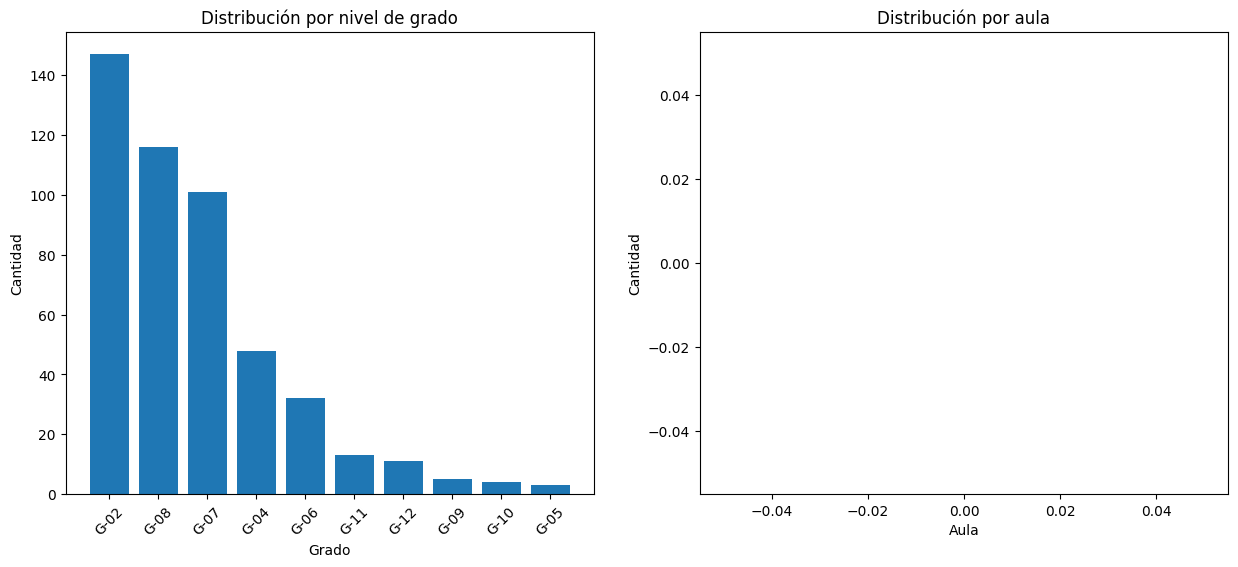

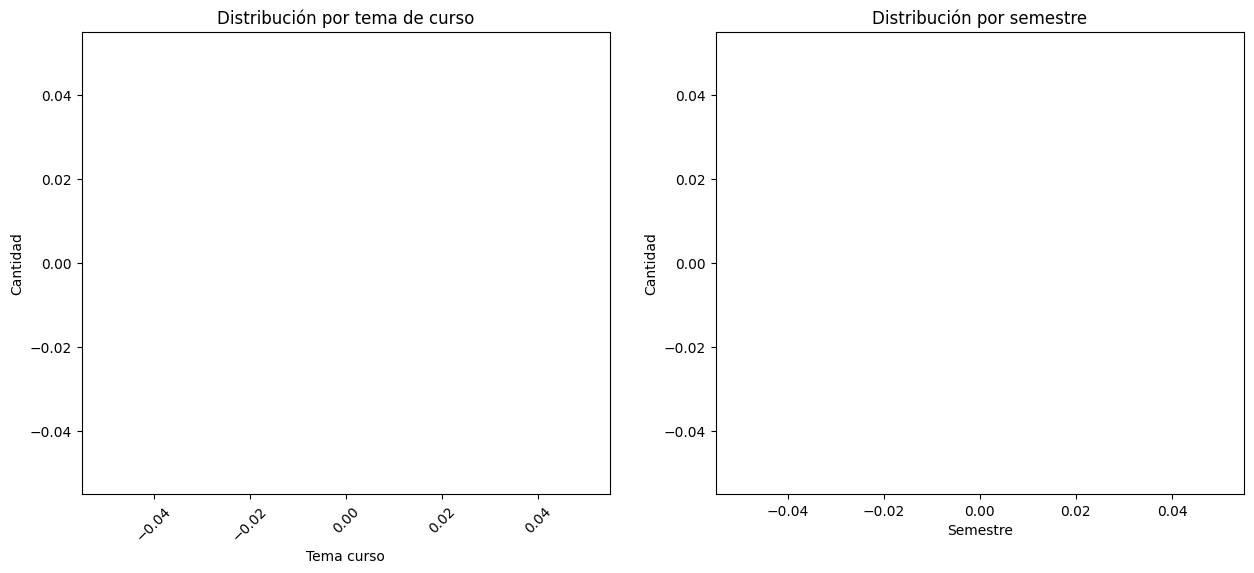

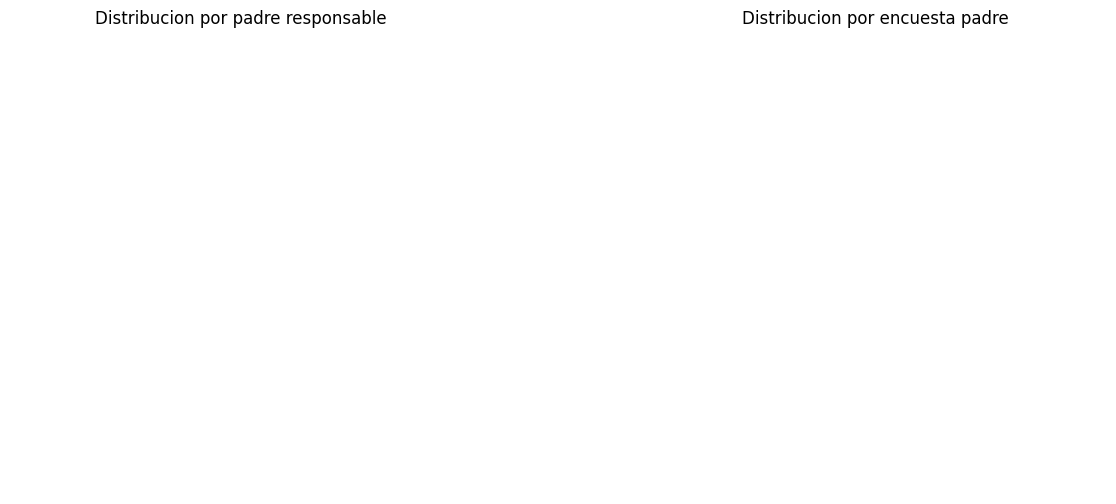

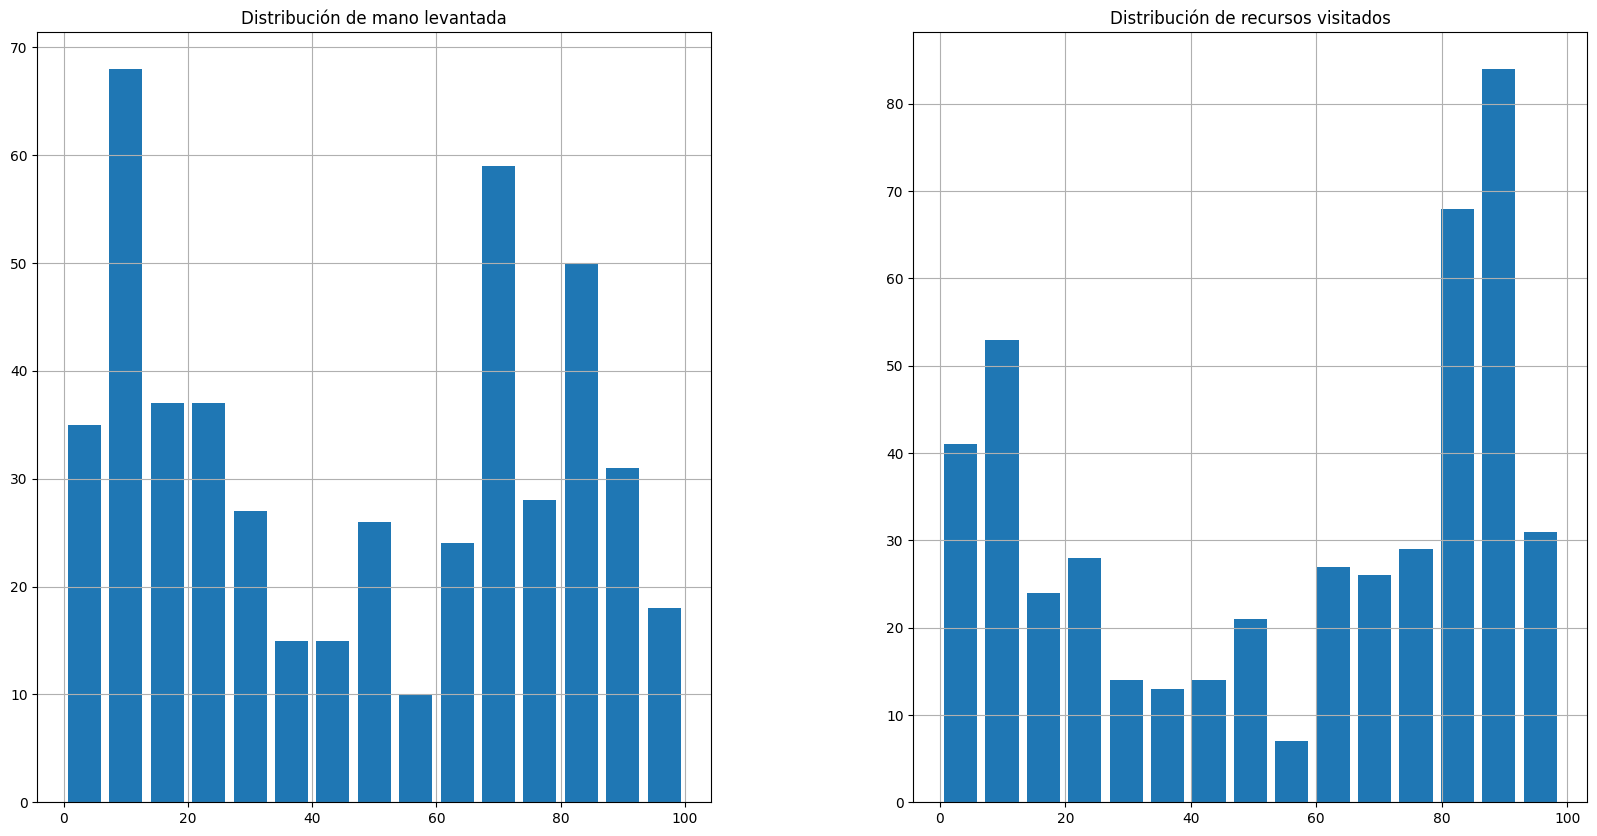

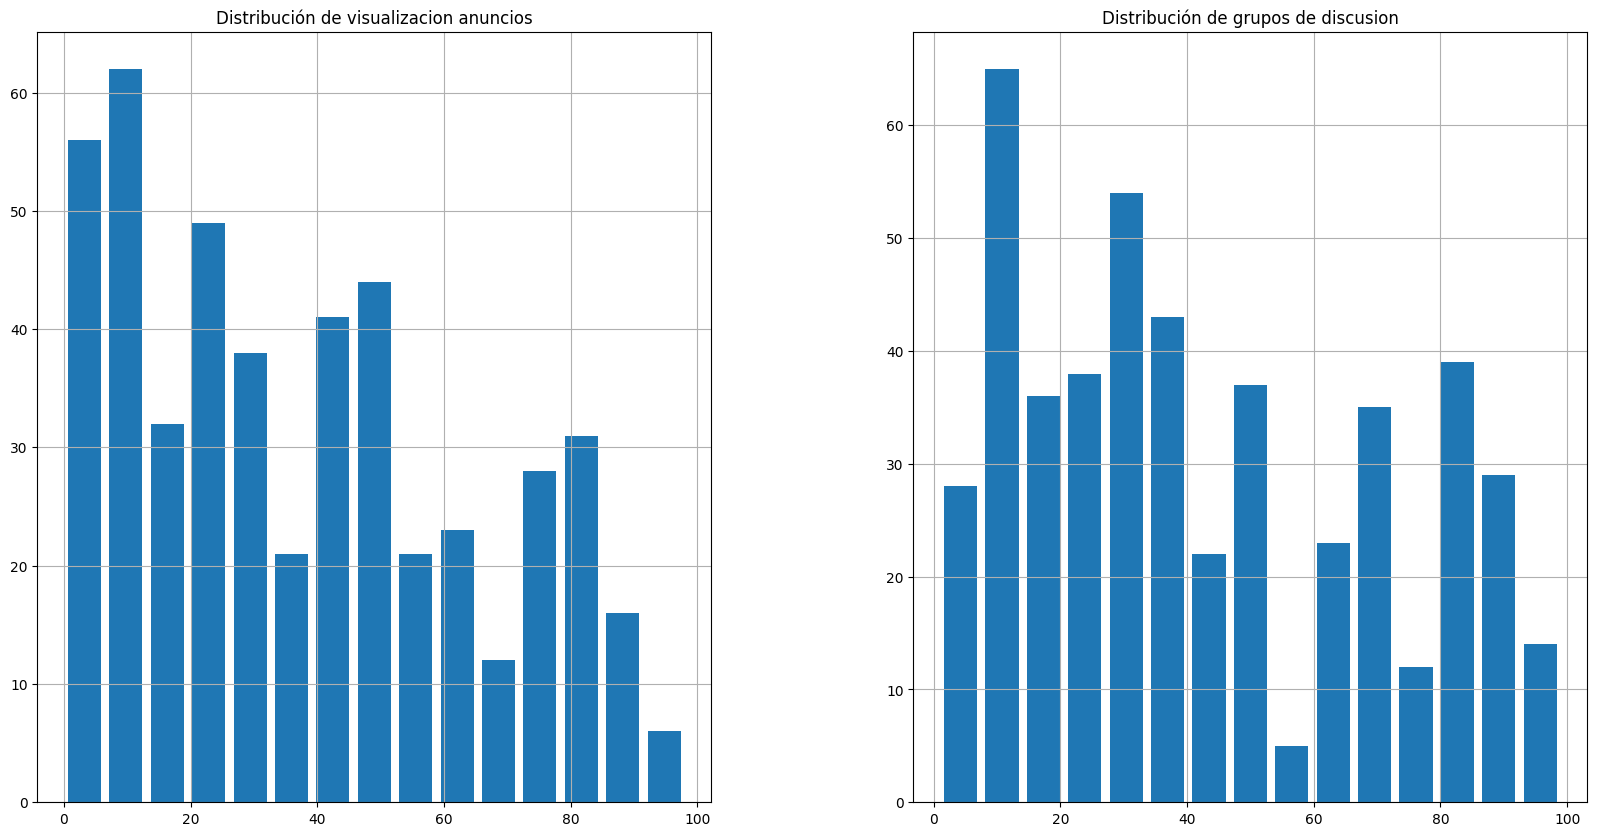

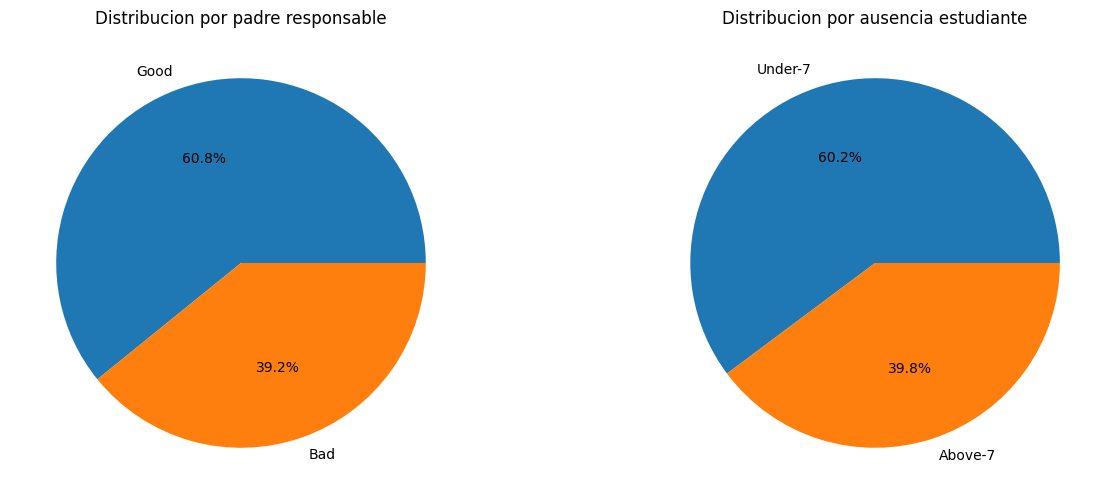

In [9]:
#Genero y nivel educativo
gender_counts = df['gender'].value_counts()
stageID_counts = df['StageID'].value_counts()
plt.figure(figsize=(15, 6))
ax= plt.subplot(1,2,1)
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribucion por genero')
ax = plt.subplot(1, 2, 2)
plt.bar(stageID_counts.index, stageID_counts.values)
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.title('Distribucion por nivel educativo')

#Nacionalidad y lugar de nacimiento
nationality_counts = df['NationalITy'].value_counts()
placeofBirth_counts = df['PlaceofBirth'].value_counts()
plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
ax.bar(nationality_counts.index, nationality_counts.values)
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad")
plt.title("Distribución por nacionalidad")
plt.xticks(rotation=55)
ax = plt.subplot(1, 2, 2)
ax.bar(placeofBirth_counts.index, placeofBirth_counts.values)
plt.xlabel("Lugar de nacimiento")
plt.ylabel("Cantidad")
plt.title("Distribución por lugar de nacimiento")
plt.xticks(rotation=55)

#Nivel de grado y aula pertenece
gradeID = df['GradeID'].value_counts()
sectionID = df['SectionID'].value_counts()
plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
ax.bar(gradeID.index, gradeID.values)
plt.xlabel("Grado")
plt.ylabel("Cantidad")
plt.title("Distribución por nivel de grado")
plt.xticks(rotation=45)
ax = plt.subplot(1, 2, 2)
ax.bar(sectionID.index, sectionID.values)
plt.xlabel("Aula")
plt.ylabel("Cantidad")
plt.title("Distribución por aula")

#Tema de curso y semestre
topic = df['Topic'].value_counts()
semester = df['Semester'].value_counts()
plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
ax.bar(topic.index, topic.values)
plt.xlabel("Tema curso")
plt.ylabel("Cantidad")
plt.title("Distribución por tema de curso")
plt.xticks(rotation=45)
ax = plt.subplot(1, 2, 2)
ax.bar(semester.index, semester.values)
plt.xlabel("Semestre")
plt.ylabel("Cantidad")
plt.title("Distribución por semestre")

#Padre responsable y encuesta padres
relation_counts = df['Relation'].value_counts()
parentAns_counts = df['ParentAnsweringSurvey'].value_counts()
plt.figure(figsize=(15, 6))
ax= plt.subplot(1,2,1)
ax.pie(relation_counts, labels=relation_counts.index, autopct='%1.1f%%')
plt.title('Distribucion por padre responsable')
ax = plt.subplot(1, 2, 2)
ax.pie(parentAns_counts, labels=parentAns_counts.index, autopct='%1.1f%%')
plt.title('Distribucion por encuesta padre')

#Mano levantada y recursos visitados
plt.figure(figsize=(20, 10))
ax = plt.subplot(1, 2, 1)
df.hist('raisedhands', ax=ax, bins=15, rwidth=0.8)
plt.title('Distribución de mano levantada')
ax = plt.subplot(1, 2, 2)
df.hist('VisITedResources', ax=ax, bins=15, rwidth=0.8)
plt.title('Distribución de recursos visitados')

#visualizacion anuncios y grupos de discusion
plt.figure(figsize=(20, 10))
ax = plt.subplot(1, 2, 1)
df.hist('AnnouncementsView', ax=ax, bins=15, rwidth=0.8)
plt.title('Distribución de visualizacion anuncios')
ax = plt.subplot(1, 2, 2)
df.hist('Discussion', ax=ax, bins=15, rwidth=0.8)
plt.title('Distribución de grupos de discusion')

#Satisfaccion padres y dias de ausencia
parentSat_counts = df['ParentschoolSatisfaction'].value_counts()
studentAbs_counts = df['StudentAbsenceDays'].value_counts()
plt.figure(figsize=(15, 6))
ax= plt.subplot(1,2,1)
ax.pie(parentSat_counts, labels=parentSat_counts.index, autopct='%1.1f%%')
plt.title('Distribucion por padre responsable')
ax = plt.subplot(1, 2, 2)
ax.pie(studentAbs_counts, labels=studentAbs_counts.index, autopct='%1.1f%%')
plt.title('Distribucion por ausencia estudiante')

plt.show()

Mapa de calor (HEATMAP)

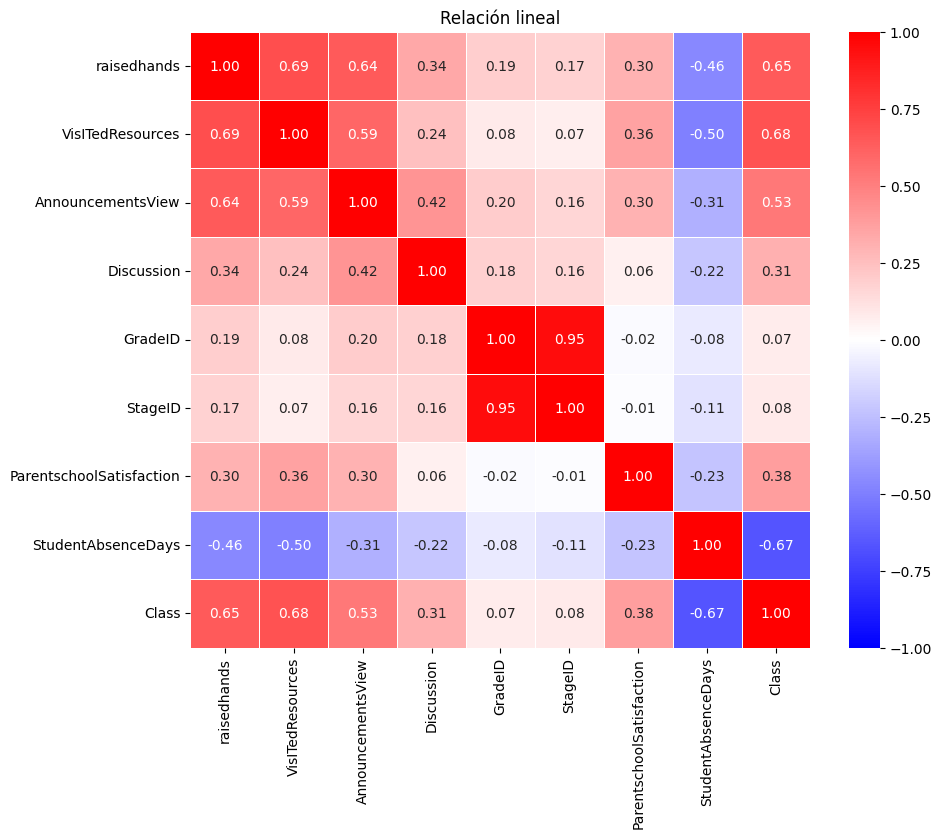

In [10]:
df = pd.read_csv("xAPI-Edu-Data.csv")

# Todas las columnas con valores categoricos va a ser definidas ahora con valores numericos para usarse en el heatmap

class_mapping = {"L": 0, "M": 1, "H": 2}
df["Class"] = df["Class"].map(class_mapping)

satisfaction_mapping = {"Good": 1, "Bad": 0}
df["ParentschoolSatisfaction"] = df["ParentschoolSatisfaction"].map(satisfaction_mapping)

absence_mapping = {"Under-7": 0, "Above-7": 1}
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].map(absence_mapping)

Grade_mapping = {"G-01": 1, "G-02": 2, "G-03": 3, "G-04": 4, "G-05": 5, "G-06": 6,
                 "G-07": 7, "G-08": 8, "G-09": 9, "G-10": 10, "G-11": 11, "G-12": 12}
df["GradeID"] = df["GradeID"].map(Grade_mapping)

StageID_mapping = {'lowerlevel': 0, 'MiddleSchool': 1, 'HighSchool': 2}
df['StageID'] = df['StageID'].map(StageID_mapping)

# Con todas las columnas numericas ya podemos seleccionarlas

numeric_cols = [
    "raisedhands", "VisITedResources", "AnnouncementsView", "Discussion",
    "GradeID", "StageID", "ParentschoolSatisfaction",
    "StudentAbsenceDays", "Class"
]

# Para no visualizar pixeles vacios, dropeamos todos los Null

df_numeric = df[numeric_cols].dropna()

# Con todo definidio, ya podemos crear la matriz para ejecutar la relacion lineal

correlation_matrix = df_numeric.corr()

# Creamos el Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="bwr", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Relación lineal")
plt.show()


Diagramas de Dispersion

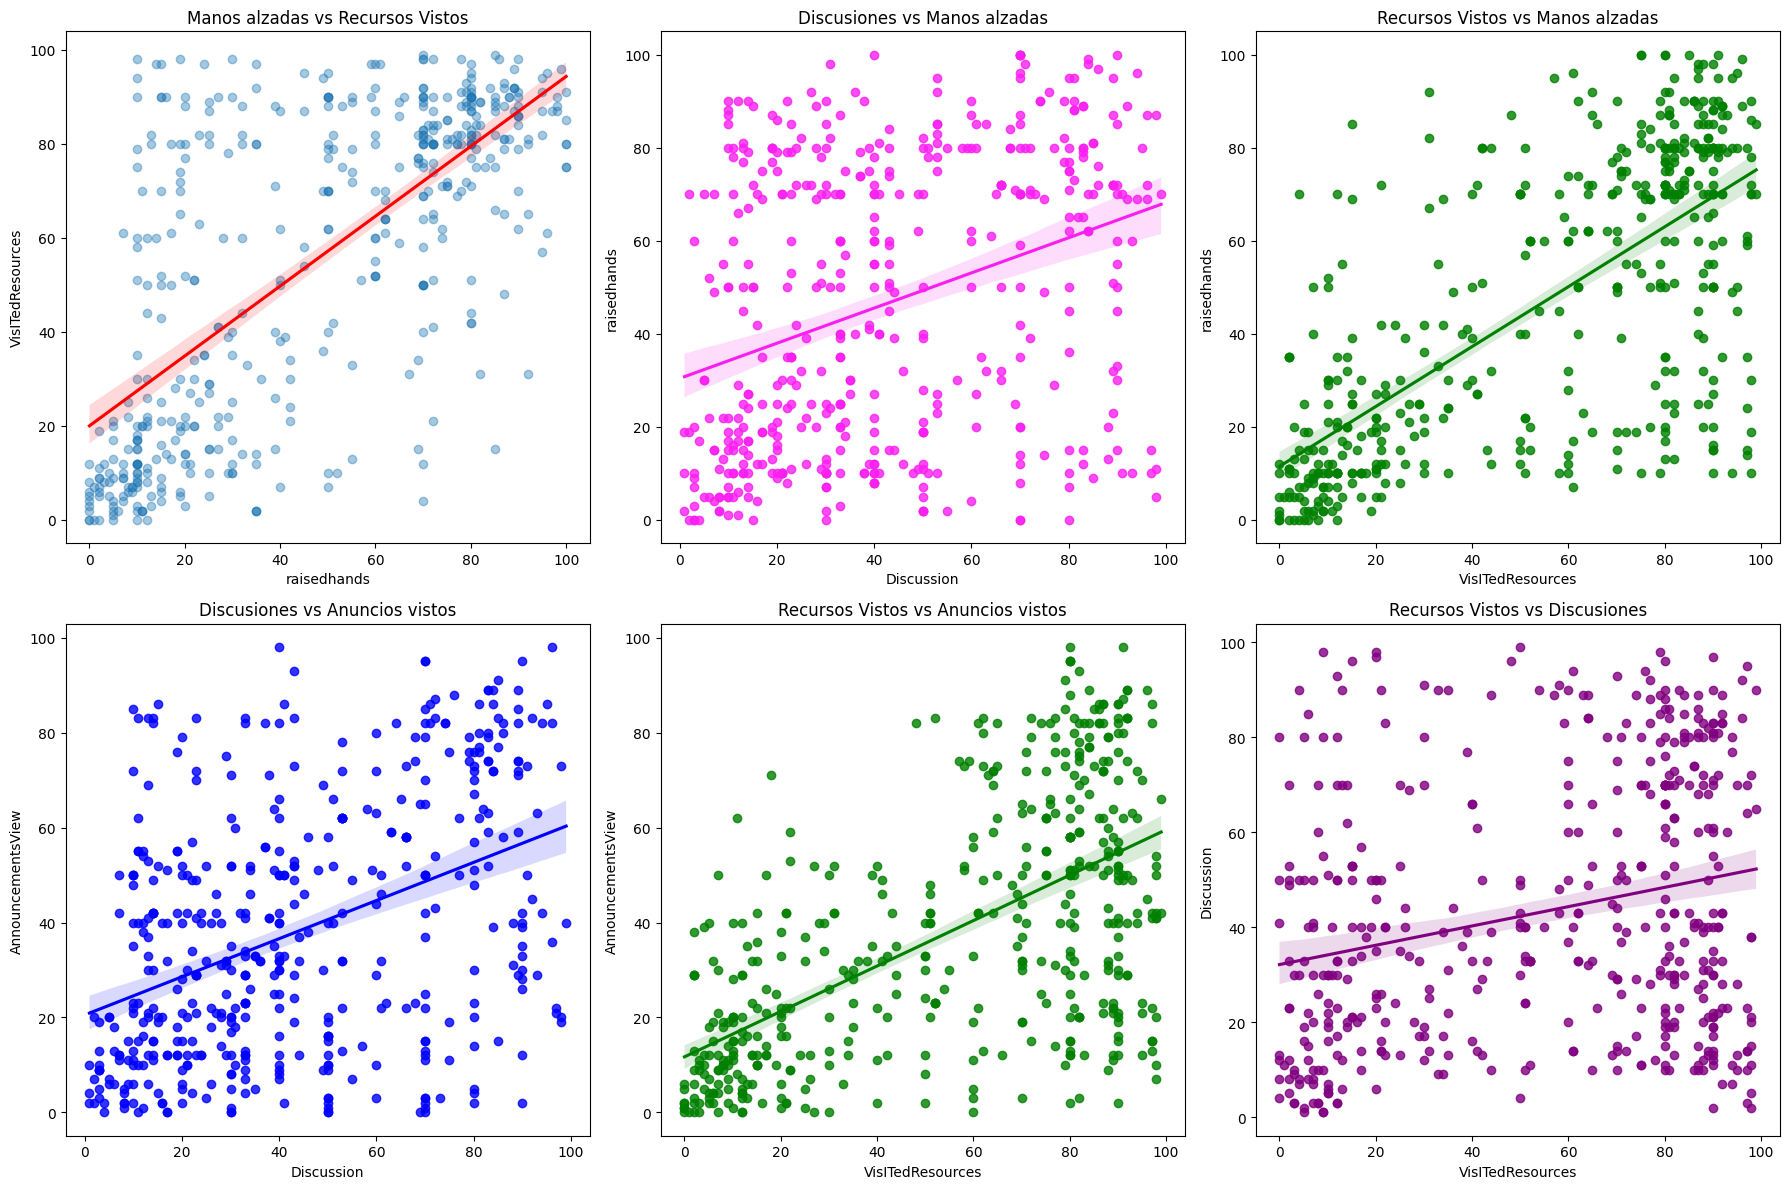

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Primer subgráfico: Manos alzadas vs Recursos Vistos
sns.regplot(
    x="raisedhands",
    y="VisITedResources",
    data=df,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"},
    ax=axes[0, 0]
)
axes[0, 0].set_title("Manos alzadas vs Recursos Vistos")

# Segundo subgráfico: Discusiones vs Manos alzadas
sns.regplot(
    x="Discussion",
    y="raisedhands",
    data=df,
    color="#FA1FF1",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Discusiones vs Manos alzadas")

# Tercer subgráfico: Manos alzadas vs Anuncios vistos
sns.regplot(
    x="VisITedResources",
    y="raisedhands",
    data=df,
    color="green",
    ax=axes[0, 2]
)
axes[0, 2].set_title("Recursos Vistos vs Manos alzadas")

# Cuarto subgráfico: Discusiones vs Anuncios vistos
sns.regplot(
    x="Discussion",
    y="AnnouncementsView",
    data=df,
    color="blue",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Discusiones vs Anuncios vistos")

# Quinto subgráfico: Recursos vistos vs Anuncios vistos
sns.regplot(
    x="VisITedResources",
    y="AnnouncementsView",
    data=df,
    color="green",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Recursos Vistos vs Anuncios vistos")

# Sexto subgráfico: Recursos vistos vs Discusiones
sns.regplot(
    x="VisITedResources",
    y="Discussion",
    data=df,
    color="purple",
    ax=axes[1, 2]
)
axes[1, 2].set_title("Recursos Vistos vs Discusiones")


plt.tight_layout()
plt.show()

# **Segunda entrega**

## Problema de clasificacion: Predecir la columna 'class'*texto en cursiva*

In [47]:
df = pd.read_csv("xAPI-Edu-Data.csv")

ParentAnsweringSurvey_mapping = {'Yes': 0, 'No': 1}
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map(ParentAnsweringSurvey_mapping)

Relation_mapping = {'Father': 0, 'Mum': 1}
df['Relation'] = df['Relation'].map(Relation_mapping)

Semester_mapping = {'F': 0, 'S': 1}
df['Semester'] = df['Semester'].map(Semester_mapping)

Topic_mapping = {'IT': 0, 'Math': 1, 'Arabic': 2, 'Science':3, 'English':4, 'Quran':5, 'Spanish':6, 'French':7,
 'History':8, 'Biology':9, 'Chemistry':10, 'Geology':11}
df['Topic'] = df['Topic'].map(Topic_mapping)

SectionID_mapping = {'A': 0, 'B': 1, 'C': 2}
df['SectionID'] = df['SectionID'].map(SectionID_mapping)

PlaceofBirth_mapping = {'KuwaIT':0, 'lebanon':1, 'Egypt':2, 'SaudiArabia':3, 'USA':4, 'Jordan':5, 'venzuela':6,
                        'Iran':7, 'Tunis':8, 'Morocco':9, 'Syria':10, 'Iraq':11, 'Palestine':12, 'Lybia':13}
df['PlaceofBirth'] = df['PlaceofBirth'].map(PlaceofBirth_mapping)

NationalITy_mapping = {'KW':0, 'lebanon':1, 'Egypt':2, 'SaudiArabia':3, 'USA':4, 'Jordan':5, 'venzuela':6,
                        'Iran':7, 'Tunis':8, 'Morocco':9, 'Syria':10, 'Iraq':11, 'Palestine':12, 'Lybia':13}
df['NationalITy'] = df['NationalITy'].map(NationalITy_mapping)

gender_mapping = {'M': 0, 'F': 1}
df['gender'] = df['gender'].map(gender_mapping)

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,0,0,lowerlevel,G-04,0,0,0,0,15,16,2,20,0,Good,Under-7,M
1,0,0,0,lowerlevel,G-04,0,0,0,0,20,20,3,25,0,Good,Under-7,M
2,0,0,0,lowerlevel,G-04,0,0,0,0,10,7,0,30,1,Bad,Above-7,L
3,0,0,0,lowerlevel,G-04,0,0,0,0,30,25,5,35,1,Bad,Above-7,L
4,0,0,0,lowerlevel,G-04,0,0,0,0,40,50,12,50,1,Bad,Above-7,M


## **DECISION TREE**

### Estimadores








In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est= DecisionTreeClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.7604166666666666


### Learning curves

## **RANDOM FOREST**


### Estimador

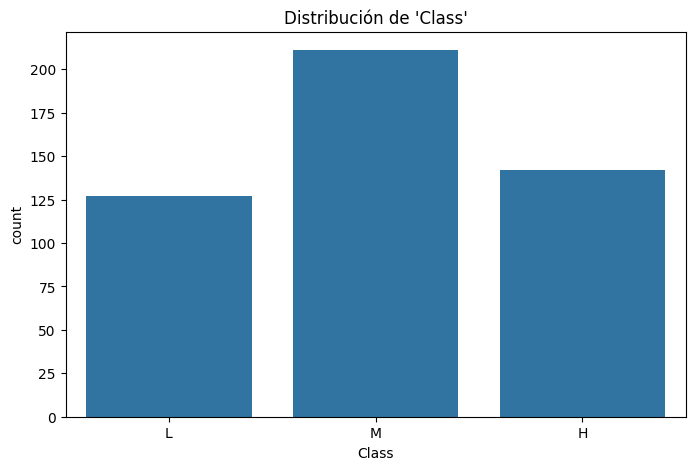

Class
M    43.958333
H    29.583333
L    26.458333
Name: proportion, dtype: float64
Accuracy de Random Forest: 0.7708

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.73      0.76      0.74        42
           2       0.80      0.71      0.75        28

    accuracy                           0.77        96
   macro avg       0.78      0.77      0.78        96
weighted avg       0.77      0.77      0.77        96



In [48]:
#Librerias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Ver distribucion de clases
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', order=['L', 'M', 'H'])
plt.title("Distribución de 'Class'")
plt.show()

print(df['Class'].value_counts(normalize=True) * 100)

#Clasificacion
df['Class'] = df['Class'].map({'L': 0, 'M': 1, 'H': 2})
df_encoded = pd.get_dummies(df.drop('Class', axis=1))
df_final = pd.concat([df_encoded, df['Class']], axis=1)

X = df_final.drop('Class', axis=1)
y = df_final['Class']

# Particionar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy de Random Forest: {accuracy:.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


### Learning Curve

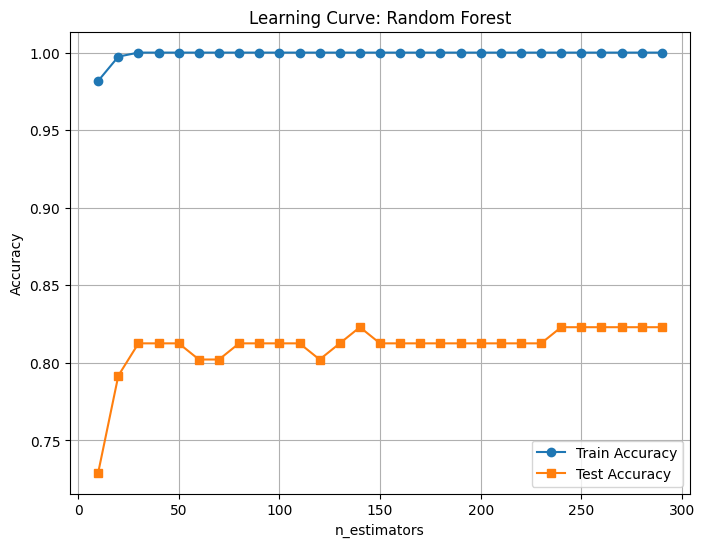


Mejor número de estimadores: 140
Precisión en test: 0.8229

==== Reporte de clasificación ====
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.75      0.90      0.82        42
           2       0.95      0.66      0.78        29

    accuracy                           0.82        96
   macro avg       0.86      0.81      0.82        96
weighted avg       0.84      0.82      0.82        96



In [46]:
#Array del rango de nuestro n_stimators
n_estimators_list = [i for i in range(10, 300, 10)]
train_scores = []
test_scores = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=30)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=30,
                                                        stratify=y)
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

#Grafica
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, train_scores, marker='o', label='Train Accuracy')
plt.plot(n_estimators_list, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Random Forest')
plt.legend()
plt.grid(True)
plt.show()


#Usar el mejor n_stimator
best_idx = np.argmax(test_scores)
best_n_estimators = n_estimators_list[best_idx]
print(f"\nMejor número de estimadores: {best_n_estimators}")
print(f"Precisión en test: {test_scores[best_idx]:.4f}")

# Entrenar modelo final con mejor n_estimators
final_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=30)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\n==== Reporte de clasificación ====")
print(classification_report(y_test, y_pred))